In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [144]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 170)

In [145]:
df=pd.read_csv("Diabetestype (1).csv")


In [146]:
df.head()



,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.80,8.80,11.20,7.20,62,Type1,1
1,31,5.20,6.80,10.90,4.20,33,Normal,0
2,32,6.80,8.80,11.20,7.20,62,Type1,1
3,21,5.70,5.80,10.70,4.80,49,Normal,0
4,33,6.80,8.80,11.20,7.20,62,Type1,1


In [147]:
ndf=df.drop(['Type'], axis=1)


In [148]:
print("Diabetes data set dimensions : {}".format(ndf.shape))
ndf.groupby('Class').size()

Diabetes data set dimensions : (1009, 7)


Class
0    631
1    378
dtype: int64

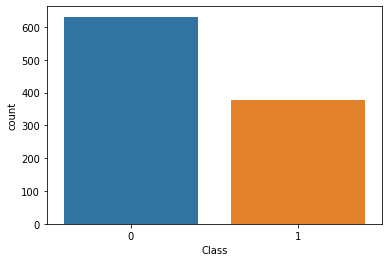

In [149]:
sns.countplot(x="Class", data=ndf); #countig outcome

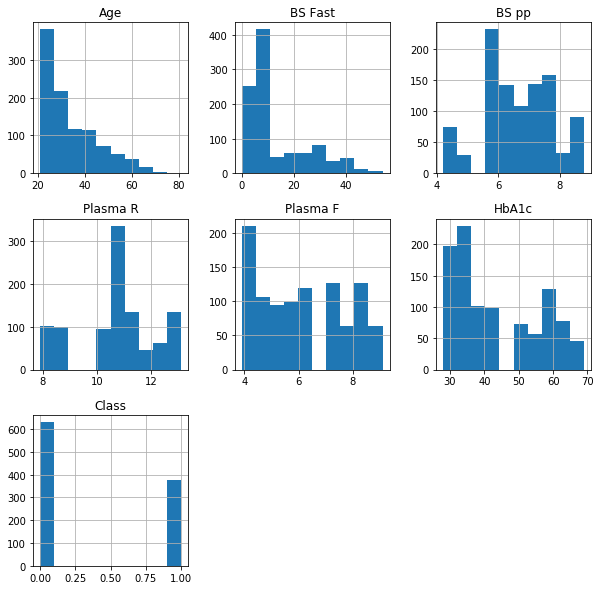

In [150]:
ndf.hist(bins = 10, figsize = (10,10))#looking all data set
pl.show()

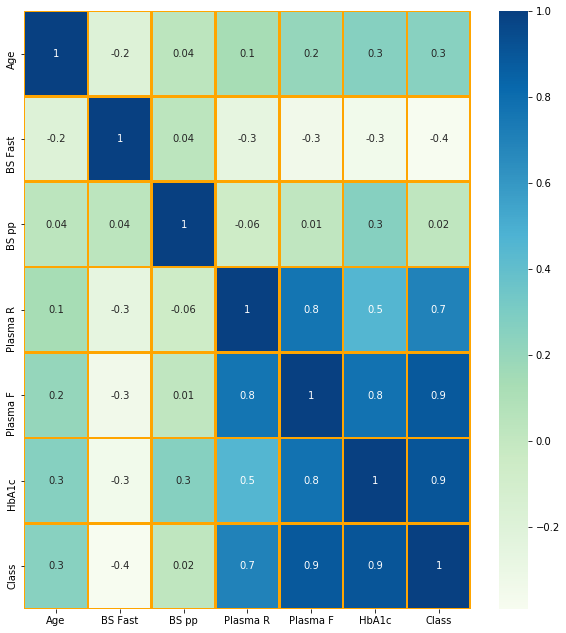

In [151]:
pl.figure(figsize = (10,11)) 
sns.heatmap(ndf.corr(),robust=True,fmt='.1g',linewidths=1.5,linecolor = 'orange', annot=True, cmap='GnBu'); #heat map

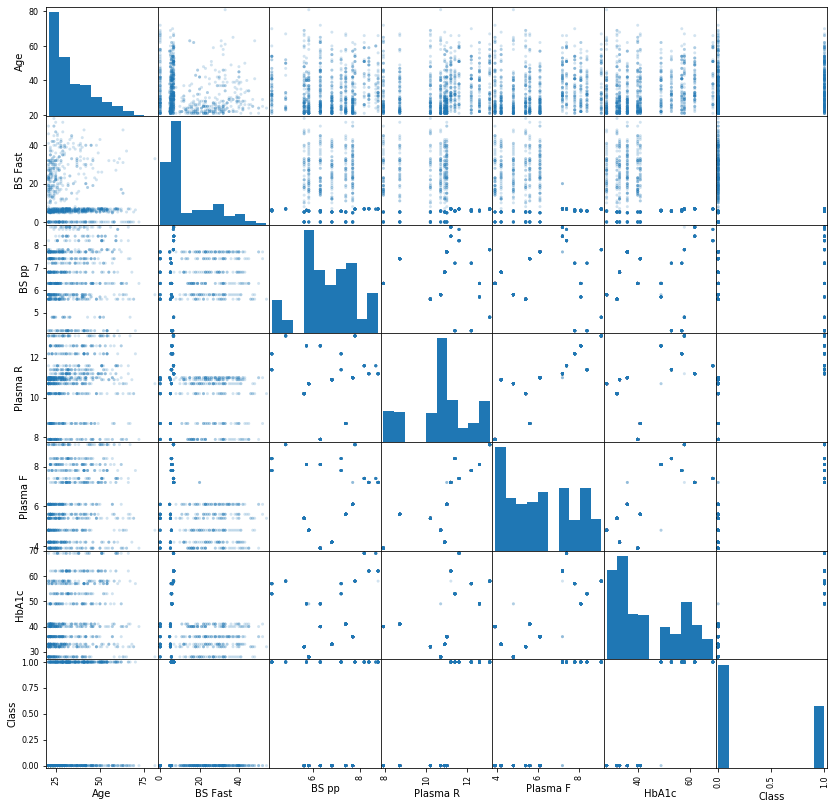

In [152]:

pd.plotting.scatter_matrix(ndf, alpha=0.2,figsize=(14, 14));

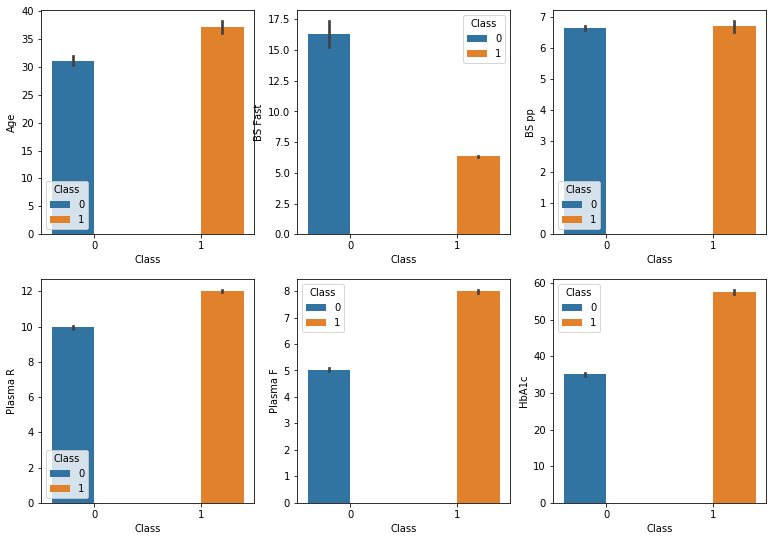

In [153]:
#looking each collum to outcome
pl.figure(figsize=(13,14))
pl.subplot(3,3,1)
sns.barplot(x='Class',y='Age',data=df,hue="Class")
pl.subplot(3,3,2)
sns.barplot(x='Class',y='BS Fast',data=df,hue="Class")
pl.subplot(3,3,3)
sns.barplot(x='Class',y='BS pp',data=df,hue="Class")
pl.subplot(3,3,4)
sns.barplot(x='Class',y='Plasma R',data=df,hue="Class")
pl.subplot(3,3,5)
sns.barplot(x='Class',y='Plasma F',data=df,hue="Class")
pl.subplot(3,3,6)
sns.barplot(x='Class',y='HbA1c',data=df,hue="Class");



In [154]:
ndf.isnull().sum()

Age         0
BS Fast     0
BS pp       0
Plasma R    0
Plasma F    0
HbA1c       0
Class       0
dtype: int64

In [155]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1009.00,33.40,11.63,21.00,24.00,29.00,41.00,81.00
BS Fast,1009.00,12.57,12.33,0.00,5.60,6.70,20.00,54.00
BS pp,1009.00,6.66,1.21,4.20,5.80,6.80,7.70,8.80
Plasma R,1009.00,10.73,1.44,7.90,10.20,10.90,11.40,13.10
Plasma F,1009.00,6.14,1.62,3.90,4.80,5.60,7.80,9.10
HbA1c,1009.00,43.48,12.07,28.00,33.00,40.00,53.00,69.00
Class,1009.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00


In [156]:
def outcome_agg(col):
    for i in col:  
        print(ndf.groupby("Class").agg({i: "mean"}))

In [157]:
def get_cols(ndf, target):
    cols = []
    for col in ndf.columns:
        if col!=target:
            cols.append(col)
    return cols

In [158]:
var_names=get_cols(ndf, "Class")
var_names

['Age', 'BS Fast', 'BS pp', 'Plasma R', 'Plasma F', 'HbA1c']

In [159]:
cols=['Age','BS Fast','BS pp','Plasma R','Plasma F','HbA1c']

def c_dis_plot(ndf, cols):
    for col in cols:
        sns.boxplot(ndf[col])
        pl.axvline(ndf[col].mean(),color='r',label='mean',linestyle='--')
        pl.axvline(np.median(ndf[col]),color='b',label='median')
        pl.axvline((ndf[col].mode())[0],color='g',label='mode')
        pl.legend()
        pl.show();


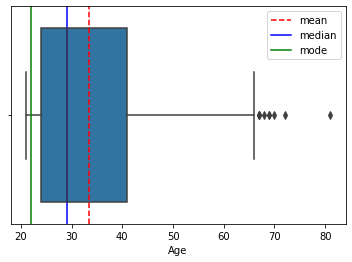

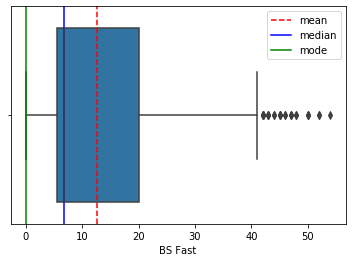

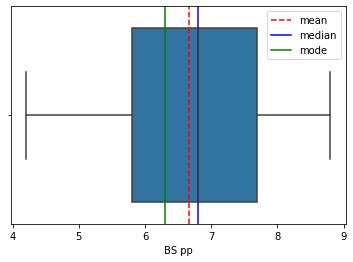

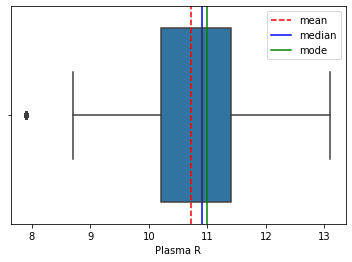

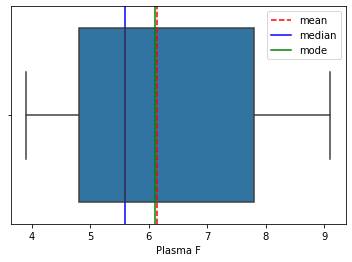

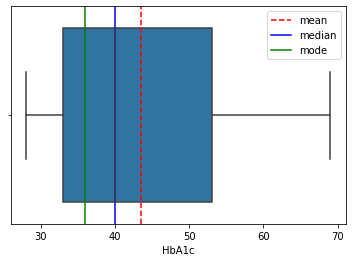

In [160]:
c_dis_plot(ndf,var_names)